In [1]:
import glob
import matplotlib.pyplot as plt
from matplotlib import cycler
import datetime
import pandas as pd
import os
import helper
import numpy as np
import seaborn as sns
import itertools
import json
import subprocess
from tqdm import tqdm

Text(0.5, 1.0, 'Histogram of test duration')

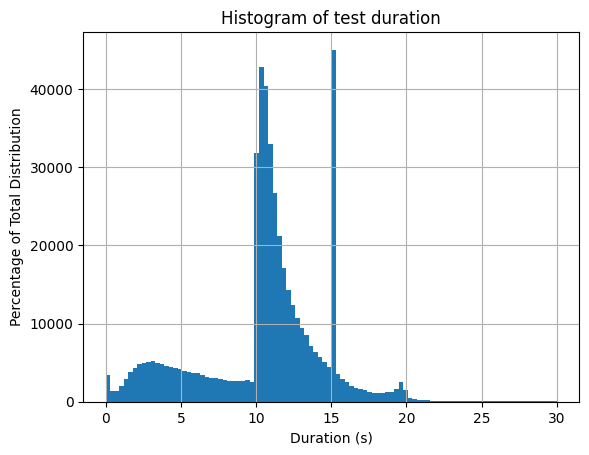

In [2]:
# load raw_tests.csv into a pandas dataframe
df = pd.read_csv('main.csv')

# add a column to the datafram called 'duration' which is the difference between the 'EndTime' and 'StartTime' columns
df['duration'] = pd.to_datetime(df['EndTime']) - pd.to_datetime(df['StartTime'])

# filter out the tests that have duration more than 30s
df = df[df['duration'] < datetime.timedelta(seconds=30)]

# plot a histogram of the duration of the tests
plt.figure()
df['duration'].dt.total_seconds().hist(bins=100)
plt.xlabel('Duration (s)')
plt.ylabel('Percentage of Total Distribution')
plt.title('Histogram of test duration')


Text(0.5, 1.0, 'Duration vs. Throughput')

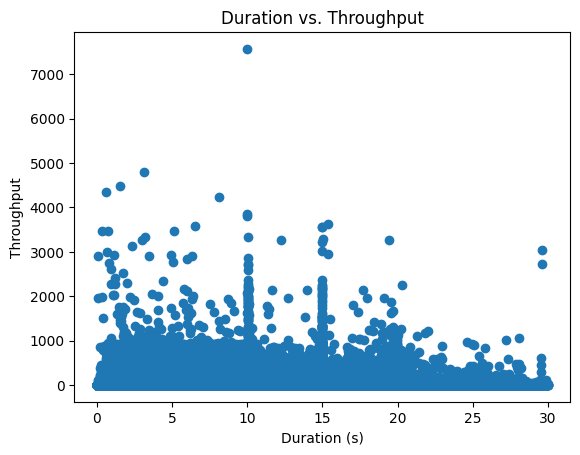

In [3]:
# create a scatterplot of duration vs. throughput result
plt.figure()
plt.scatter(df['duration'].dt.total_seconds(), df['MeanThroughputMbps'])
plt.xlabel('Duration (s)')
plt.ylabel('Throughput')
plt.title('Duration vs. Throughput')

Text(0.5, 1.0, 'Duration vs. Loss Rate')

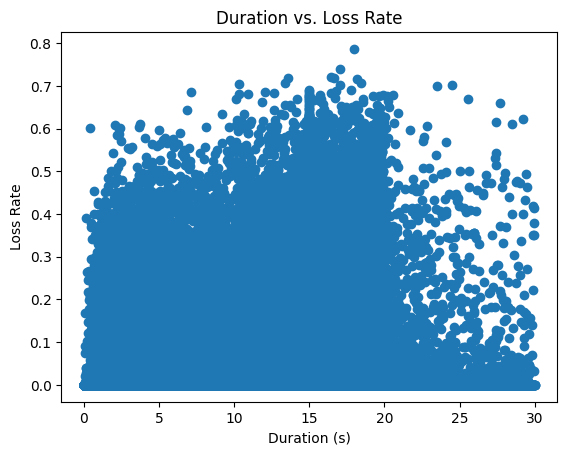

In [4]:
# create a scatterplot of duration vs. LossRate result
plt.figure()
plt.scatter(df['duration'].dt.total_seconds(), df['LossRate'])
plt.xlabel('Duration (s)')
plt.ylabel('Loss Rate')
plt.title('Duration vs. Loss Rate')

In [5]:
# calculate the percentage of tests that are exactly 15 seconds
n_15s = len(df[df['duration'] == datetime.timedelta(seconds=15)])
n_total = len(df)
p_15s = n_15s / n_total
print(f'{p_15s:.5f} of tests are exactly 15 seconds')

# calculate the percentage of tests that are less than 15 seconds
n_less_15s = len(df[df['duration'] < datetime.timedelta(seconds=15)])
p_less_15s = n_less_15s / n_total
print(f'{p_less_15s:.5f} of tests are less than 15 seconds')

# calculate the percentage of tests that are greater than 15 seconds
n_greater_15s = len(df[df['duration'] > datetime.timedelta(seconds=15)])
p_greater_15s = n_greater_15s / n_total
print(f'{p_greater_15s:.5f} of tests are greater than 15 seconds')

# calculate the percentage of tests that are within 0.0001 seconds of 15 seconds
n_15s_plusminus_0_0001s = len(df[(df['duration'] > datetime.timedelta(seconds=14.9999)) & (df['duration'] < datetime.timedelta(seconds=15.0001))])
p_15s_plusminus_0_0001s = n_15s_plusminus_0_0001s / n_total
print(f'{p_15s_plusminus_0_0001s:.5f} of tests are within 0.0001 seconds of 15 seconds')

# calculate the percentage of tests that are within 0.001 seconds of 15 seconds
n_15s_plusminus_0_001s = len(df[(df['duration'] > datetime.timedelta(seconds=14.999)) & (df['duration'] < datetime.timedelta(seconds=15.001))])
p_15s_plusminus_0_001s = n_15s_plusminus_0_001s / n_total
print(f'{p_15s_plusminus_0_001s:.5f} of tests are within 0.001 seconds of 15 seconds')

# calculate the percentage of tests that are within 0.005 seconds of 15 seconds
n_15s_plusminus_0_005s = len(df[(df['duration'] > datetime.timedelta(seconds=14.995)) & (df['duration'] < datetime.timedelta(seconds=15.005))])
p_15s_plusminus_0_005s = n_15s_plusminus_0_005s / n_total
print(f'{p_15s_plusminus_0_005s:.5f} of tests are within 0.005 seconds of 15 seconds')

# calculate the percentage of tests that are within 0.01 seconds of 15 seconds
n_15s_plusminus_0_01s = len(df[(df['duration'] > datetime.timedelta(seconds=14.99)) & (df['duration'] < datetime.timedelta(seconds=15.01))])
p_15s_plusminus_0_01s = n_15s_plusminus_0_01s / n_total
print(f'{p_15s_plusminus_0_01s:.5f} of tests are within 0.01 seconds of 15 seconds')

# calculate the percentage of tests that are within 0.05 seconds of 15 seconds
n_15s_plusminus_0_05s = len(df[(df['duration'] > datetime.timedelta(seconds=14.95)) & (df['duration'] < datetime.timedelta(seconds=15.05))])
p_15s_plusminus_0_05s = n_15s_plusminus_0_05s / n_total
print(f'{p_15s_plusminus_0_05s:.5f} of tests are within 0.05 seconds of 15 seconds')


# calculate the percentage of tests that are within 1 second of 15 seconds
n_15s_plusminus_1s = len(df[(df['duration'] > datetime.timedelta(seconds=14)) & (df['duration'] < datetime.timedelta(seconds=16))])
p_15s_plusminus_1s = n_15s_plusminus_1s / n_total
print(f'{p_15s_plusminus_1s:.5f} of tests are within 1 second of 15 seconds')

# calculate the percentage of tests that are within 2 seconds of 15 seconds
n_15s_plusminus_2s = len(df[(df['duration'] > datetime.timedelta(seconds=13)) & (df['duration'] < datetime.timedelta(seconds=17))])
p_15s_plusminus_2s = n_15s_plusminus_2s / n_total
print(f'{p_15s_plusminus_2s:.5f} of tests are within 2 seconds of 15 seconds')








0.00010 of tests are exactly 15 seconds
0.84690 of tests are less than 15 seconds
0.15299 of tests are greater than 15 seconds
0.01580 of tests are within 0.0001 seconds of 15 seconds
0.07729 of tests are within 0.001 seconds of 15 seconds
0.08329 of tests are within 0.005 seconds of 15 seconds
0.08371 of tests are within 0.01 seconds of 15 seconds
0.08624 of tests are within 0.05 seconds of 15 seconds
0.14204 of tests are within 1 second of 15 seconds
0.20847 of tests are within 2 seconds of 15 seconds


In [6]:
# filter the dataframe to only include tests that are within 0.005 seconds of 15 seconds
df_15s = df[(df['duration'] > datetime.timedelta(seconds=14.995)) & (df['duration'] < datetime.timedelta(seconds=15.005)) & (df['MeanThroughputMbps'] > 0.01)]

df_15s.to_csv('df_15s_plusminus_0_005s.csv', index=False)


In [8]:
# Split the ids into two parts
ids_part1 = ids[:len(ids)//2]
ids_part2 = ids[len(ids)//2:]

# Add single quotes around each id value for both parts
ids_with_quotes_part1 = [f"'{id_}'" for id_ in ids_part1]
ids_with_quotes_part2 = [f"'{id_}'" for id_ in ids_part2]

# Split the dates into two parts
dates_part1 = dates[:len(dates)//2]
dates_part2 = dates[len(dates)//2:]

# Add single quotes around each date value for both parts
dates_with_quotes_part1 = [f"'{date_}'" for date_ in dates_part1]
dates_with_quotes_part2 = [f"'{date_}'" for date_ in dates_part2]

# Construct the first query
query_part1 = f"""
SELECT id, parser.ArchiveURL, parser.Filename 
FROM `measurement-lab.ndt_raw.pcap` 
WHERE id IN ({', '.join(ids_with_quotes_part1)}) 
AND date IN ({', '.join(dates_with_quotes_part1)})
"""

# Construct the second query
query_part2 = f"""
SELECT id, parser.ArchiveURL, parser.Filename 
FROM `measurement-lab.ndt_raw.pcap` 
WHERE id IN ({', '.join(ids_with_quotes_part2)}) 
AND date IN ({', '.join(dates_with_quotes_part2)})
"""

print(query_part1)
print(query_part2)



SELECT id, parser.ArchiveURL, parser.Filename 
FROM `measurement-lab.ndt_raw.pcap` 
WHERE id IN ('ndt-virtual-jjtpf_1681094047_0000000000161571', 'ndt-virtual-kf8tv_1678234292_0000000000364558', 'ndt-virtual-66bzh_1681172278_0000000000195D35', 'ndt-virtual-29zdc_1681322854_0000000000113BA3', 'ndt-virtual-s8pzt_1681322946_0000000000111A34', 'ndt-virtual-zsspz_1681001843_00000000000AE0B9', 'ndt-virtual-jt2vf_1681089654_00000000000C22B9', 'ndt-virtual-8fc96_1681088953_00000000000C3CC6', 'ndt-virtual-v52dk_1681092422_000000000016024C', 'ndt-virtual-v52dk_1681092422_000000000015C8CB', 'ndt-virtual-pkf8f_1683418647_00000000000085ED', 'ndt-virtual-tvqdh_1681094387_0000000000378FFB', 'ndt-virtual-45tkm_1681603760_00000000002C49F3', 'ndt-virtual-pkf8f_1683418647_000000000000C5EB', 'ndt-virtual-fh284_1681085897_00000000000C1930', 'ndt-virtual-kf8tv_1678234292_000000000036717C', 'ndt-virtual-x844t_1681091243_0000000000318532', 'ndt-virtual-29zdc_1681322854_000000000010C6DA', 'ndt-virtual-pkf8f_1

In [9]:
# Load both CSV files into separate dataframes
download_info1 = pd.read_csv('download_info1.csv')
download_info2 = pd.read_csv('download_info2.csv')

# Concatenate the two dataframes
download_info = pd.concat([download_info1, download_info2])

# Join the download_info dataframe with the df_15s dataframe on the 'id' column
df_15s_download_info = df_15s.join(download_info.set_index('id'), on='id')

# Filter out all the rows where the 'ArchiveURL' or 'Filename' column doesn't exist
df_15s_download_info = df_15s_download_info.dropna(subset=['ArchiveURL', 'Filename'])

# Save the joined dataframe to a csv file
df_15s_download_info.to_csv('df_15s_download_info.csv', index=False)

In [10]:
# return the number of archive urls that have more than one test
archive_urls = df_15s_download_info['ArchiveURL'].value_counts()
archive_urls = archive_urls[archive_urls > 1]
print(f'{len(archive_urls)} archive urls have more than one test')

# low number share archives, we won't optimize for this case



147 archive urls have more than one test


In [11]:
def process_row(row):
    try:
        # Download the archive
        download_command = f"gsutil cp {row['ArchiveURL']} ."
        subprocess.run(download_command, shell=True, check=True, stdout=subprocess.DEVNULL, stderr=subprocess.STDOUT)

        # Get the name of the archive file from the URL
        archive_filename = row['ArchiveURL'].split('/')[-1]

        # Extract the specified file
        extract_command = f"tar -xzvf {archive_filename} {row['Filename']}"
        subprocess.run(extract_command, shell=True, check=True, stdout=subprocess.DEVNULL, stderr=subprocess.STDOUT)

        # Move the extracted file to the local 'pcaps' folder
        os.makedirs('pcaps', exist_ok=True)
        move_command = f"mv {row['Filename']} pcaps/"
        subprocess.run(move_command, shell=True, check=True, stdout=subprocess.DEVNULL, stderr=subprocess.STDOUT)

        # Delete the downloaded archive
        os.remove(archive_filename)
    except subprocess.CalledProcessError as e:
        print(f"Error processing {row['Filename']}: {e}")

In [16]:
# Load the dataframe (assuming it's already loaded)
# df_15s_download_info = pd.read_csv('df_15s_download_info.csv')

# Add a 'processed' column if it doesn't exist
if 'processed' not in df_15s_download_info.columns:
    df_15s_download_info['processed'] = False

# Group by 'date' and select 100 values for each date
rows_to_process = []
for date, group in df_15s_download_info.groupby('date'):
    rows_to_process.extend(group.head(100).to_dict('records'))

# Load the progress file if it exists
progress_file = 'progress.json'
if os.path.exists(progress_file):
    with open(progress_file, 'r') as file:
        processed_urls = set(json.load(file))
else:
    processed_urls = set()

# Process rows with a single progress bar
for row in tqdm(rows_to_process, desc="Processing rows"):
    # Skip rows that have already been processed
    if row['ArchiveURL'] in processed_urls:
        pass
    else:
        process_row(row)
    
    # Mark the row as processed
    df_15s_download_info.loc[
        (df_15s_download_info['ArchiveURL'] == row['ArchiveURL']) & 
        (df_15s_download_info['Filename'] == row['Filename']), 'processed'] = True
    
    # Add the processed URL to the set and save progress
    processed_urls.add(row['ArchiveURL'])
    with open(progress_file, 'w') as file:
        json.dump(list(processed_urls), file)

# Create a new DataFrame with just the processed rows
processed_df = df_15s_download_info[df_15s_download_info['processed']]

print(processed_df)

Processing rows:   1%|▏         | 166/11954 [00:53<1:03:22,  3.10it/s]


KeyboardInterrupt: 

In [15]:
# save the processed_df to a csv file
processed_df.to_csv('processed_df.csv', index=False)